In [1]:
import pandas as pd
import numpy as np
import simulator.env as env

In [2]:
np.random.seed(1337)

In [2]:
reload(env)

<module 'simulator.env' from 'simulator/env.pyc'>

In [3]:
env.state_list

['current_price',
 'rolling_mean',
 'rolling_std',
 'cross_upper_band',
 'cross_lower_band',
 'upper_band',
 'lower_band',
 'price_over_sma']

In [3]:
df = pd.read_csv("data/0700.HK.csv", index_col="Date", parse_dates=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-04-10,228.000000,228.399994,225.399994,226.399994,225.876862,7479213
2017-04-11,228.000000,228.000000,224.199997,225.000000,224.480103,9446922
2017-04-12,225.399994,231.000000,225.199997,231.000000,230.466248,15740467
2017-04-13,229.600006,233.800003,228.800003,230.600006,230.067169,20659980
2017-04-18,230.600006,231.800003,228.000000,228.000000,227.473175,14813343


In [5]:
df.shape

(245, 6)

In [6]:
stock_env = env.Environment(data=df, recent_k=60)

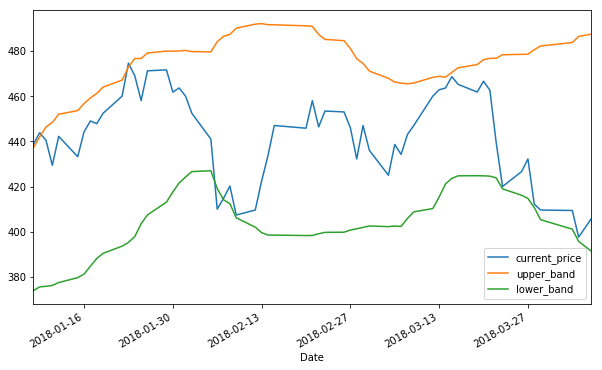

In [7]:
stock_env.plot(states_to_plot=['current_price', 'upper_band', 'lower_band'])

## Benchmarks

In [8]:
import simulator.benchmarks as benchmarks

In [22]:
reload(benchmarks)

<module 'simulator.benchmarks' from 'simulator/benchmarks.py'>

### Random

In [12]:
benchmarks.run_random_agent(data=df)

0.00 stocks, 40895.46 cash, 40895.46 current value, -31.84 percent returns


-31.84089577470689

### BBA with 0 Threshold

In [13]:
benchmarks.run_bollingerband_agent(data=df)

98.96 stocks, 18000.03 cash, 57757.50 current value, -3.74 percent returns


-3.7374952618413348

In [20]:
benchmarks.run_bollingerband_agent(data=df, recent_k=60, )

98.96 stocks, 18000.03 cash, 57757.50 current value, -3.74 percent returns


-3.7374952618413348

### BBA with 5 Threshold

In [15]:
benchmarks.run_bollingerband_agent(data=df, bollinger_threshold=5)

173.90 stocks, 0.00 cash, 69862.33 current value, 16.44 percent returns


16.437222951484848

In [33]:
benchmarks.run_bollingerband_agent(data=df, recent_k=60, init_order_ratio=0.9, bollinger_threshold=5)

152.18 stocks, 0.02 cash, 61135.58 current value, 1.89 percent returns


1.8926402605478021

In [24]:
benchmarks.run_bollingerband_agent(data=df, recent_k=30, bollinger_threshold=5)

141.04 stocks, 0.03 cash, 56661.08 current value, -5.56 percent returns


-5.5648668814863296

### BBA with 10 Threshold

In [16]:
benchmarks.run_bollingerband_agent(data=df, bollinger_threshold=10)

172.11 stocks, 0.01 cash, 69142.66 current value, 15.24 percent returns


15.237759548507045

In [17]:
benchmarks.run_bollingerband_agent(data=df, recent_k=60, bollinger_threshold=10)

142.72 stocks, 0.00 cash, 57337.62 current value, -4.44 percent returns


-4.4372969927475543

In [19]:
benchmarks.run_bollingerband_agent(data=df, recent_k=30, bollinger_threshold=10)

96.22 stocks, 18000.03 cash, 56653.64 current value, -5.58 percent returns


-5.5772666819333372

### Always Buy

In [21]:
benchmarks.run_alwaysbuy_agent(data=df)

263.49 stocks, 0.02 cash, 105855.94 current value, 76.43 percent returns


76.426563083703201

In [35]:
benchmarks.run_alwaysbuy_agent(data=df, recent_k=60)

134.97 stocks, 0.03 cash, 54222.46 current value, -9.63 percent returns


-9.6292331181223449

In [36]:
benchmarks.run_alwaysbuy_agent(data=df, recent_k=30)

130.72 stocks, 0.02 cash, 52515.09 current value, -12.47 percent returns


-12.474843245665664

## DDQN

In [4]:
import simulator.ddqn_agent as agent

Using TensorFlow backend.


In [13]:
reload(agent)

<module 'simulator.ddqn_agent' from 'simulator/ddqn_agent.py'>

In [5]:
trader = agent.DDQNAgent(data=df, verbose = False,
                      epsilon_min = 0.0,
                      external_states = ["current_price", "cross_upper_band", "cross_lower_band"],
                      internal_states = ["is_holding_stock"])

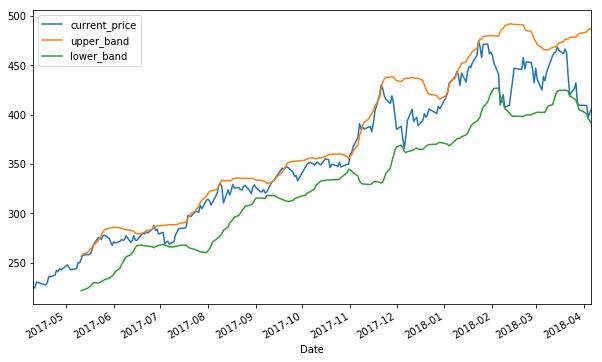

In [6]:
trader.plot_env(states_to_plot=["current_price", "upper_band", "lower_band"])

In [7]:
trader.train(num_episodes=800)

episode: 1/800, returns: -42.8006376911, epsilon: 1.0
episode: 2/800, returns: -21.2987377359, epsilon: 0.99
episode: 3/800, returns: -51.2249147138, epsilon: 0.99
episode: 4/800, returns: -56.5210806799, epsilon: 0.99
episode: 5/800, returns: -40.544374788, epsilon: 0.98
episode: 6/800, returns: -40.197244811, epsilon: 0.98
episode: 7/800, returns: -47.542782501, epsilon: 0.97
episode: 8/800, returns: -39.3309977435, epsilon: 0.97
episode: 9/800, returns: -54.3923973121, epsilon: 0.96
episode: 10/800, returns: -39.2207076787, epsilon: 0.96
episode: 11/800, returns: -31.0095887076, epsilon: 0.95
episode: 12/800, returns: -52.0088925927, epsilon: 0.95
episode: 13/800, returns: -39.7552943591, epsilon: 0.94
episode: 14/800, returns: -49.4254192688, epsilon: 0.94
episode: 15/800, returns: -34.4809977389, epsilon: 0.93
episode: 16/800, returns: -34.2577765396, epsilon: 0.93
episode: 17/800, returns: -32.5329954208, epsilon: 0.92
episode: 18/800, returns: -38.4125501156, epsilon: 0.92
episo

episode: 148/800, returns: -26.0329897922, epsilon: 0.48
episode: 149/800, returns: -19.2508491505, epsilon: 0.48
episode: 150/800, returns: -15.2289090294, epsilon: 0.47
episode: 151/800, returns: -22.9021636572, epsilon: 0.47
episode: 152/800, returns: 12.2092236256, epsilon: 0.47
episode: 153/800, returns: -19.8188918524, epsilon: 0.47
episode: 154/800, returns: -26.914504085, epsilon: 0.46
episode: 155/800, returns: -13.0090965039, epsilon: 0.46
episode: 156/800, returns: 18.4543356811, epsilon: 0.46
episode: 157/800, returns: 13.2256215968, epsilon: 0.46
episode: 158/800, returns: -19.8180111863, epsilon: 0.46
episode: 159/800, returns: 4.64909160521, epsilon: 0.45
episode: 160/800, returns: -19.8867017975, epsilon: 0.45
episode: 161/800, returns: 6.1261692238, epsilon: 0.45
episode: 162/800, returns: -35.1920649207, epsilon: 0.45
episode: 163/800, returns: 6.44817296217, epsilon: 0.44
episode: 164/800, returns: -20.0619281207, epsilon: 0.44
episode: 165/800, returns: -4.653407354

episode: 294/800, returns: 11.8878473849, epsilon: 0.23
episode: 295/800, returns: 4.02220229406, epsilon: 0.23
episode: 296/800, returns: -1.63325322434, epsilon: 0.23
episode: 297/800, returns: 18.5611437803, epsilon: 0.23
episode: 298/800, returns: 5.89019313871, epsilon: 0.23
episode: 299/800, returns: 8.25497308471, epsilon: 0.22
episode: 300/800, returns: 18.7477845932, epsilon: 0.22
episode: 301/800, returns: 1.23159570248, epsilon: 0.22
episode: 302/800, returns: 11.2050142408, epsilon: 0.22
episode: 303/800, returns: 18.1292689801, epsilon: 0.22
episode: 304/800, returns: 8.69786891464, epsilon: 0.22
episode: 305/800, returns: 22.9314170744, epsilon: 0.22
episode: 306/800, returns: 30.1666229073, epsilon: 0.22
episode: 307/800, returns: 24.9839954994, epsilon: 0.22
episode: 308/800, returns: 24.8597497537, epsilon: 0.21
episode: 309/800, returns: -11.1411899553, epsilon: 0.21
episode: 310/800, returns: 14.9796486476, epsilon: 0.21
episode: 311/800, returns: 29.0512573659, epsi

episode: 441/800, returns: 45.8368118237, epsilon: 0.11
episode: 442/800, returns: 61.5420244851, epsilon: 0.11
episode: 443/800, returns: 36.087889777, epsilon: 0.11
episode: 444/800, returns: 58.8209109447, epsilon: 0.11
episode: 445/800, returns: 36.8663649942, epsilon: 0.11
episode: 446/800, returns: 49.1541251356, epsilon: 0.11
episode: 447/800, returns: 52.2802005542, epsilon: 0.11
episode: 448/800, returns: 48.4821022831, epsilon: 0.11
episode: 449/800, returns: -2.55426836127, epsilon: 0.11
episode: 450/800, returns: 18.2826048617, epsilon: 0.11
episode: 451/800, returns: 53.9758646635, epsilon: 0.1
episode: 452/800, returns: 36.8318955034, epsilon: 0.1
episode: 453/800, returns: 22.9429944402, epsilon: 0.1
episode: 454/800, returns: 14.3939860225, epsilon: 0.1
episode: 455/800, returns: 9.28788528363, epsilon: 0.1
episode: 456/800, returns: 58.8622374193, epsilon: 0.1
episode: 457/800, returns: 34.8436346388, epsilon: 0.1
episode: 458/800, returns: 29.3754759066, epsilon: 0.1


episode: 586/800, returns: 50.4621906626, epsilon: 0.053
episode: 587/800, returns: 6.19761570073, epsilon: 0.053
episode: 588/800, returns: 2.63627314788, epsilon: 0.053
episode: 589/800, returns: 49.0168086386, epsilon: 0.052
episode: 590/800, returns: 14.4864128069, epsilon: 0.052
episode: 591/800, returns: 36.4039715247, epsilon: 0.052
episode: 592/800, returns: -8.15779638741, epsilon: 0.052
episode: 593/800, returns: -5.7051848332, epsilon: 0.051
episode: 594/800, returns: 35.6257056853, epsilon: 0.051
episode: 595/800, returns: 59.7965937124, epsilon: 0.051
episode: 596/800, returns: 49.4975423003, epsilon: 0.051
episode: 597/800, returns: 60.6708104649, epsilon: 0.05
episode: 598/800, returns: 65.6176668523, epsilon: 0.05
episode: 599/800, returns: 71.6372051521, epsilon: 0.05
episode: 600/800, returns: 56.5529614278, epsilon: 0.05
episode: 601/800, returns: 74.424132971, epsilon: 0.049
episode: 602/800, returns: 66.5782588621, epsilon: 0.049
episode: 603/800, returns: 74.13225

episode: 731/800, returns: 29.1331494555, epsilon: 0.026
episode: 732/800, returns: 0.0, epsilon: 0.026
episode: 733/800, returns: 38.9232606221, epsilon: 0.025
episode: 734/800, returns: 0.449444612255, epsilon: 0.025
episode: 735/800, returns: 8.01610145074, epsilon: 0.025
episode: 736/800, returns: -2.587450002, epsilon: 0.025
episode: 737/800, returns: 2.92294203271, epsilon: 0.025
episode: 738/800, returns: 64.6272727893, epsilon: 0.025
episode: 739/800, returns: 69.1186603192, epsilon: 0.025
episode: 740/800, returns: 69.957286885, epsilon: 0.025
episode: 741/800, returns: 76.4265630837, epsilon: 0.024
episode: 742/800, returns: 72.2169728291, epsilon: 0.024
episode: 743/800, returns: 62.4158922715, epsilon: 0.024
episode: 744/800, returns: 51.3683812023, epsilon: 0.024
episode: 745/800, returns: 77.4267455225, epsilon: 0.024
episode: 746/800, returns: 76.4265630837, epsilon: 0.024
episode: 747/800, returns: 76.4265630837, epsilon: 0.024
episode: 748/800, returns: 70.9871790219, 

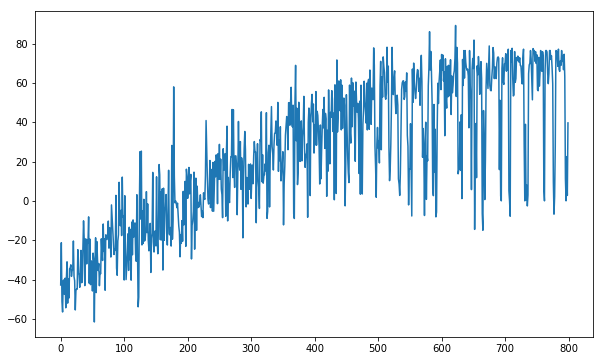

In [8]:
trader.plot_cum_returns()

In [9]:
trader.test()

Action.HOLD
Action.HOLD
Action.HOLD
Action.HOLD
Action.HOLD
Action.HOLD
Action.HOLD
Action.HOLD
Action.HOLD
Action.HOLD
Action.HOLD
Action.HOLD
Action.HOLD
Action.HOLD
Action.HOLD
Action.HOLD
Action.HOLD
Action.HOLD
Action.HOLD
Action.HOLD
Action.HOLD
Action.HOLD
Action.HOLD
Action.HOLD
Action.HOLD
Action.HOLD
Action.HOLD
Action.HOLD
Action.HOLD
Action.HOLD
Action.HOLD
Action.HOLD
Action.HOLD
Action.HOLD
Action.HOLD
Action.HOLD
Action.HOLD
Action.HOLD
Action.HOLD
Action.HOLD
Action.HOLD
Action.HOLD
Action.HOLD
Action.HOLD
Action.HOLD
Action.HOLD
Action.HOLD
Action.HOLD
Action.HOLD
Action.HOLD
Action.HOLD
Action.HOLD
Action.HOLD
Action.HOLD
Action.HOLD
Action.HOLD
Action.HOLD
Action.HOLD
Action.HOLD
Action.HOLD
Action.HOLD
Action.HOLD
Action.HOLD
Action.HOLD
Action.HOLD
Action.HOLD
Action.HOLD
Action.HOLD
Action.HOLD
Action.HOLD
Action.HOLD
Action.HOLD
Action.HOLD
Action.HOLD
Action.BUY
Action.HOLD
Action.HOLD
Action.HOLD
Action.HOLD
Action.HOLD
Action.HOLD
Action.HOLD
Action.HOLD
Actio